In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [2]:
df_all = pd.read_csv('../reports/benchmark_foredeck/results.csv')

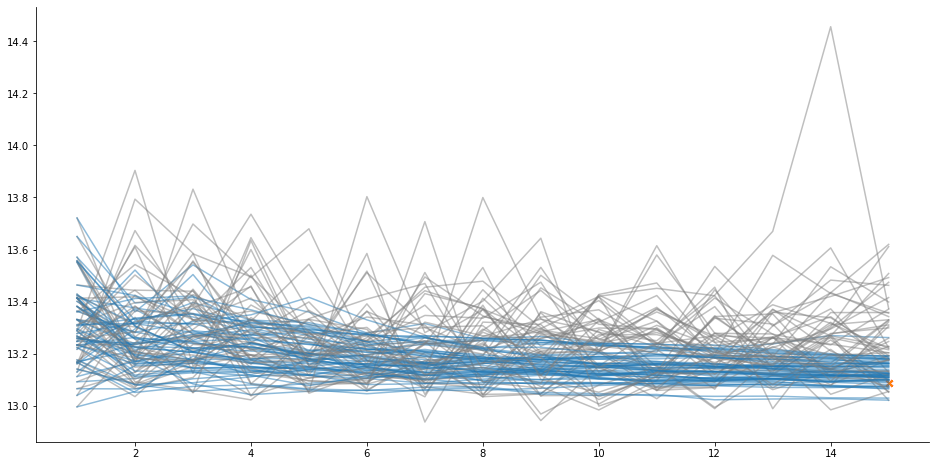

In [3]:
emax = int(df_all['epoch'].max())

plt.figure(figsize=(16, 8))

ax = plt.subplot(111)
for n in sorted(df_all['num'].unique()):
    if not n >= 0:
        continue
    tmp = df_all[df_all['num'] == n]
    base = tmp[~tmp['ensemble']].dropna()
    ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)
    ens = tmp[tmp['ensemble']].dropna()
    ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
    ax.scatter([emax], list(df_all[(df_all['epoch'].isna()) & (df_all['num'].isna())]['smape']), c='C1', marker='x')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

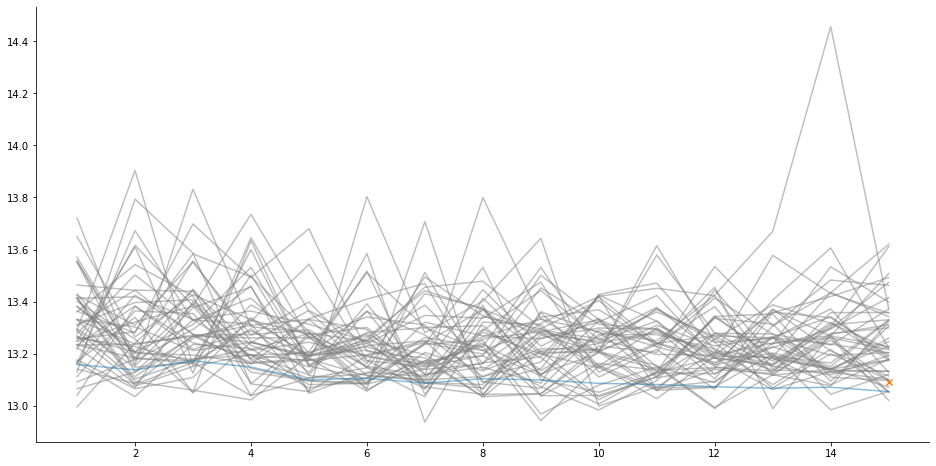

In [4]:
plt.figure(figsize=(16, 8))

ax = plt.subplot(111)
for n in sorted(df_all['num'].unique()):
    if not n >= 0:
        continue
    tmp = df_all[df_all['num'] == n]
    base = tmp[~tmp['ensemble']].dropna()
    ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)    
    
ens = df_all[df_all['num'].isna() & df_all['epoch'].notna()]

ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
ax.scatter([emax], list(df_all[df_all['num'] < 0]['smape']), c='C1', marker='x')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

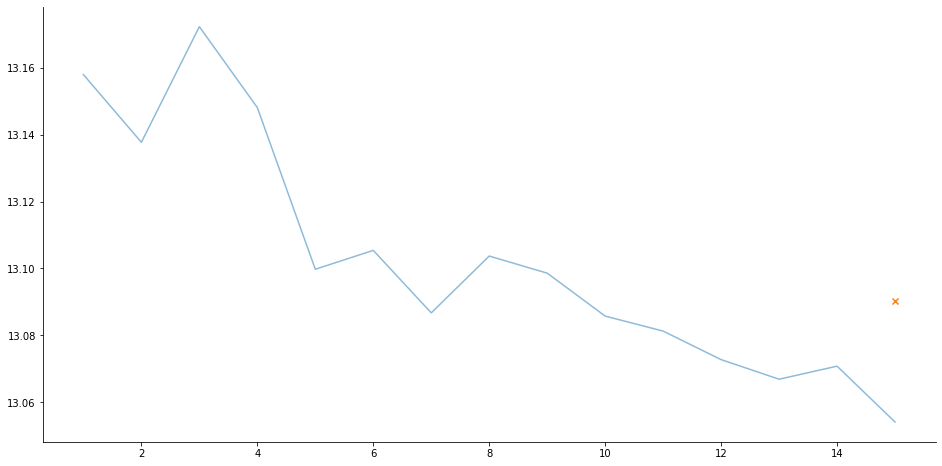

In [5]:
plt.figure(figsize=(16, 8))

ax = plt.subplot(111)
ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
ax.scatter([emax], list(df_all[df_all['num'] < 0]['smape']), c='C1', marker='x')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [6]:
df_all[df_all.isna().any(axis=1)]

,input_len,num,epoch,ensemble,smape,mase*
1500,14,NaN,0.0,True,13.157959,2.499599
1501,14,NaN,1.0,True,13.137721,2.497891
1502,14,NaN,2.0,True,13.172270,2.505626
1503,14,NaN,3.0,True,13.148098,2.502782
1504,14,NaN,4.0,True,13.099772,2.491661
1505,14,NaN,5.0,True,13.105418,2.494944
1506,14,NaN,6.0,True,13.086741,2.490922
1507,14,NaN,7.0,True,13.103717,2.497384
1508,14,NaN,8.0,True,13.098606,2.497533
1509,14,NaN,9.0,True,13.085779,2.493535
